# Course Project


## Table of Contents

1. [Introduction](#1) <br>
1.1. [Project Overview](#1.1)<br>
1.2. [Problem Statement](#1.2)<br>
1.3. [Dataset](#1.3)<br>
2. [Data Preparation](#2)<br>
    2.1. [Importing Python Libraries and loading the dataset](#2.1)<br>
    2.2. [Missing Values](#2.2)<br>
    2.3. [Impossible/Redundant Columns](#2.3)<br>
    2.4.[Encoding Variables](#2.4)<br>
    2.4.1.[Label Encoding of Target Variable](#2.4.1)<br>
    2.4.2.[One-hot Encoding of Categorical Variables](#2.4.2)<br>
3. [EDA](#3)<br>
3.1.[One-Variable Plot](#3.1)<br>
    3.1.1.[Attrition](#3.1.1)<br>
    3.1.2.[WorkLife Balance](#3.1.2)<br>
    3.1.3.[JobSatisfaction](#3.1.3)<br>
    3.1.4.[Age](#3.1)<br>
3.2. [Two-Variable Plot](#3.2)<br>
    3.2.1.[YearsInCurrentRole v/s Attrition](#3.2.1)<br>
    3.2.2.[Monthly Income v/s Attrition](#3.2.2)<br>
    3.2.3.[OverTime v/s Attrition](#3.2.3)<br>
3.3. [Three-Variable Plot](#3.3)<br>
     3.3.1.[JobRole vs HourlyRate vs Attrition](#3.3.1)<br>
     3.3.2.[MonthlyIncome vs JobLevel vs Attrition](#3.3.2)<br>
     3.3.3.[Age vs Gender vs Attrition](#3.3.3)<br>
3.4. [EDA Conclusion](#3.4)<br>
4. [Predictive Modelling](#4)<br>
    4.1.[Modelling Approach](#4.1)<br>
    4.2.[Feature Engineering](#4.2)<br>
    4.3.[Feature Scaling](#4.3)<br>
    4.4.[Feature Selection](#4.4)<br>
    4.5.[Data Sampling and Train-Test Split](#4.5)<br>
    4.6.[Model evaluation](#4.6)<br>
    4.7.[Hyper-Parameter Tuning](#4.7)<br>
    4.7.1.[KNN](#4.7.1)<br>
    4.7.2.[Naive Bayes](#4.7.2)<br>
    4.7.3.[Random Forest](#4.7.3)<br>
    4.7.4.[Logistic Regression](#4.7.4)<br>
    4.8. [Performance Evaluation](#4.8)<br>
    4.8.1. [Paired T-test](#4.8.1)<br>
    4.8.2.[Classification Report](#4.8.2)<br>
    4.8.3 [ROC](#4.8.3)<br>
5. [Conclusion](#5)<br>
6. [Assumptions, Strengths, Weaknesses and Limitations](#6)<br>
    6.1. [Assumptions](#6.1)<br>
    6.2. [Strengths and Wekanesses](#6.2)<br>
    6.3. [Limitations](#6.3)<br>
7. [References](#7)<br>



## 1. Introduction <a id="1"></a>

### 1.1. Project Overview <a id="1.1"></a>
Employee Attrition is amongst major issues, daunting the HR department of every organisation. 
* __Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced__.

It is a costly issue as the real cost of replacing an employee can be significantly high (specifically for management-level employees). The cost borne by the company is in terms of the recruitment process, traning of the new employee and the loss of productivity till the new employee achieves the benchmark. 
HR Analytics comprise of various programs to identify causes of attrition and subsequently improve retention rate through motivation and compensation systems. 

### 1.2. Problem Statement <a id="1.2"></a>

With the aim to minimise the attrition rate, it is necassary to locate the areas of the organisation that contributes to the increasing employee attrition. The major goal of the HR deaprtment is to provide a working environment that enhances employee productivity. 
By performing root-cause analysis of why employees are leaving, HR can:
* Implement programs to improve retention
* Estimate the need of hiring in advance - to minimise the period of productivity loss due to vacancy.

In this project, we will address the following problems:<br>
**1. Which factors most contribute to the employee attrition?**<br>
**2. Which employee is likely to leave the organisation?**<br>
**3. Which programs can HR implement to reduce employee attrition?**<br>

We will address these questions with the help of machine learning algorithms.  

### 1.3. Dataset <a id="1.3"></a>
The project is based on a hypothetical dataset generated by [IBM HR Analytics Employee Attrition and Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). The dataset consists of 1470 observations(rows) from past employees with 35 features(columns) describing employee's demographic and characterisitic. The target column is labelled as **Attrition** and has 2 possible values : Yes (ex-employees) and No (current employees) with a ratio of 16:84 (approximately). This is a **supervised classification problem** where we will use this dataset to predict when the employees are going to quit by analysing the main drivers of employee attrition. 

**Data Source** : Kaggle.com. 2020. IBM HR Analytics Employee Attrition & Performance. [online] Available at: <https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset> [Accessed 31 May 2020].

## 2. Data Preparation <a id="2"></a>
It is a requisite stage in data analytics as it ensures accurate data modelling and thus, prediciton results. 

### 2.1 Importing Python Libraries and loading the dataset <a id="2.1"></a>

In [1]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


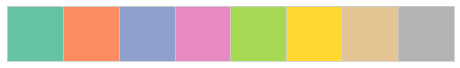

In [2]:
# loading libraries for data handling and analysis
import pandas as pd   
import numpy as np    
import os
import itertools
import warnings
warnings.filterwarnings("ignore")

# Loading libraries for data modelling
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import altair as alt

# loading libraries for data visualisations
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

sns.palplot(sns.color_palette())

In [3]:
#Loading dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv(r's3754522_Data.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


### 2.2. Missing Values <a id="2.2"></a>

In [4]:
#Checking for data structure, data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* We have imported our dataset with 1470 rows and 35 columns(including target column = Attrition). 
* We can see that there are no null values.

In [5]:
#Final check for missing values
df.isna().sum().any() #Checking na values

False

### 2.3. Impossible/Redundant Columns <a id="2.3"></a>

* Here, we explore the dataset on the basis of numerical and categorical variables.
* We use describe() to explore numerical variables and a for loop for categorical variables.

In [6]:
#Checking for any numerical column requring data processing 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
#Checking categorical columns values
for col in df.select_dtypes(['object']).columns:
    print(col, ':', sorted(df[col].unique()))
    print(df[col].value_counts())
    print('\n')

Attrition : ['No', 'Yes']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department : ['Human Resources', 'Research & Development', 'Sales']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender : ['Female', 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sale

By analysing the above results, we identify the following:
* __EmployeeCount/StandardHours__ - These numerical columns have standard value (Min=Max=Median value). 
* __EmployeeNumber__ - Id-Like column.
* __Over18__ - This categorical column also has only one value = 'Y'.

Since, these columns have standard/id values which will not lead to any change/prediction of our target variable, thus, we dropped such columns to improve QoL of coding. 

In [8]:
#Dropping columns with only 1 value as well as ID-like column
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'],axis=1,inplace=True)

In [9]:
df.head(3) # checking dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0


## 3. EDA
<a id="3"></a>

The key goal at this point of the project is to look deeper into the dataset and try to find observations and future patterns relating to the target variable in order to obtain a better understanding when it comes to selecting features for the project's modelling stage.

We have divided the exploration section in 3 parts:
 * Univariate Analysis
 * Bivariate Analysis
 * Multivariate Analysis

### 3.1. One-Variable Plot <a id="3.1"></a>

#### 3.1.1. Attrition<a id="3.1.1"></a>

We first visualize the Target variable(Attrition) and clearly there is an imbalanced class problem. The percentage of the ex-employees is 16.12% while the current employees is 83.87%. The Machine learning algorithms perform better when our Target is a Balanced class. Due to the class imbalance, we will have to implement and enhance our alogrithms to achieve higher accuracy. Methods like over/ undersampling can be used to address this issue.

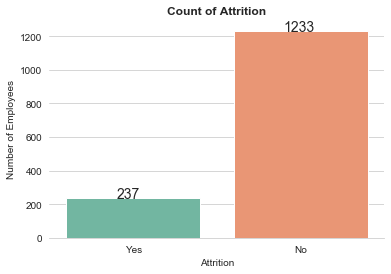

In [10]:
#Plotting Attrition counts
graph1 = sns.countplot(df['Attrition'])
sns.despine(left=True)
graph1.set_title("Count of Attrition", weight = 'bold')
graph1.set_ylabel("Number of Employees")
for p in graph1.patches:
    graph1.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()), fontsize = 14)

#### 3.1.2. Work-Life Balance<a id="3.1.2"></a>

Work Life balance is a key element of a stable workforce environment. Maintaining a work-life balance helps to alleviate tension and helps avoid workplace burnout. That is the reason we have plotted this variable to see the effect on our Target (Attrition). Here the numbers 1,2,3,4 signifies Bad, Good, Better and Best Work Life Balance, respectively. Around 60.7% of the employees feel their Work Life is balanced which is a positive sign for our further analysis.

[Text(0, 0.5, 'Number of Employees'), Text(0.5, 0, 'Work Life Balance Rating')]

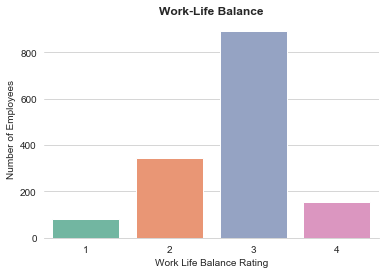

In [11]:
#Plotting Work-life Balance
graph2 = sns.countplot(df['WorkLifeBalance'])
sns.despine(left=True)
graph2.set_title("Work-Life Balance", weight = 'bold')
graph2.set(ylabel = "Number of Employees", xlabel = "Work Life Balance Rating")

#### 3.1.3. Job Satisfaction<a id="3.1.3"></a>

Job satisfaction needs to be treated with both short and long-term visions. In the short term, it is directly linked to attrition and employee-organization match. Hence, we have explored this variable to see "How satisfied are the employees?" The number 1,2,3 and 4 represents Low, Medium, High, and Very High respectively. Only 19.6% of the total employees feel unsatisfied with their current job.

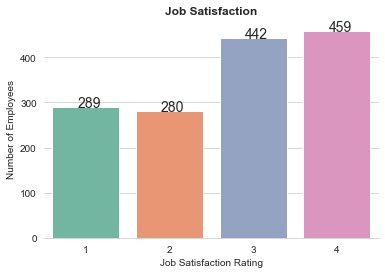

In [12]:
#Plotting Job Satisfaction Count
graph3 = sns.countplot(df['JobSatisfaction'])
sns.despine(left=True)
graph3.set_title("Job Satisfaction", weight = 'bold')
graph3.set(ylabel = "Number of Employees", xlabel = "Job Satisfaction Rating")
for p in graph3.patches:
    graph3.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()), fontsize = 14)

#### 3.1.4. Age <a id="3.1.4"></a>

Another important factor for Attrition is Age. Here we have visualized the different age group count which will help us to get a better understanding of our dataset. We can see the data is normally distributed and slightly skewed to the right.

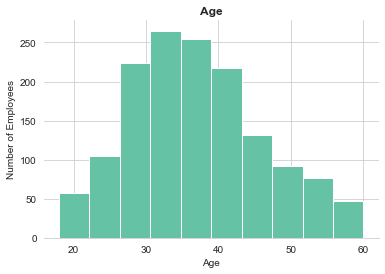

In [13]:
#Plotting Age Distribution
plt.figure(figsize=(6,4))
graph4 = sns.distplot(df.Age,kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
graph4.set_title("Age", weight = 'bold')
graph4.set_ylabel("Number of Employees")
plt.show()

##### Pearson's Correlation Coefficient: 

* Correlation is a technique for investigating the relationship between two quantitative, continuous variables, for example, age and blood pressure. 
* Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables.
* Here, we calculate the Top 5 positive and negative correlations with the Target (Attrition) variable and plot them using a diagonal correlation matrix. 
* The features "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition; while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec - reference for heatmap

In [14]:
df_HR = df.copy() # creating copy of data
df_HR['Target'] = df_HR['Attrition'].apply(lambda x: 0 if x == 'No' else 1) #encoding attrition
correlations = df_HR.corr()['Target'].sort_values() #sorting correlation by targ

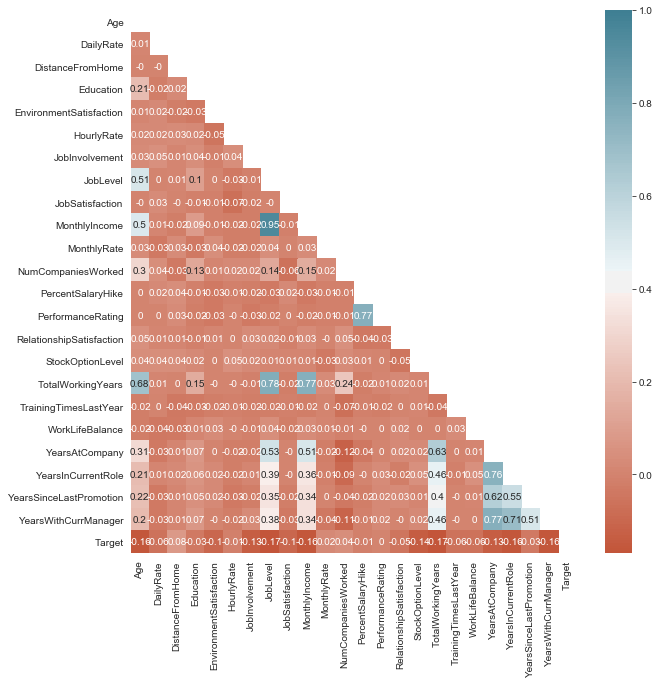

In [15]:
#Correlation matrix
mask = np.zeros_like(df_HR.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plotting heatmap
plt.figure(figsize=(10,10)) 
sns.heatmap(df_HR.corr().round(2), annot=True, mask = mask, 
           cmap=sns.diverging_palette(20, 220, n = 200))

### 3.2. Two-Variable Plot<a id="3.2"></a>

Bivariate plots are used to describe the relationship between two variables.
These include form, strength and dependence of the variable relationship on external circumstances.

#### 3.2.1. YearsInCurrentRole and Attrition<a id="3.2.1"></a>

We visualized YearsInCurrentRole and Attrition using the countplot. We can derive from the plot that in the initial years of career, employees tend to switch more often. As the number of years increases, the Attrition rate is almost negligible.

[Text(0, 0.5, 'Number of Employees'),
 Text(0.5, 1.0, 'YearsInCurrentRole v/s Attrition')]

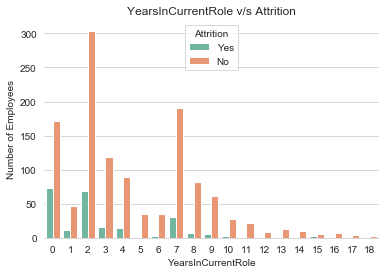

In [16]:
# Plotting YearsInCurrentRole v/s Attrition
plt.figure(figsize=(6,4))
graph5 = sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df)
sns.despine(left=True)
graph5.set(title='YearsInCurrentRole v/s Attrition', ylabel ='Number of Employees')

#### 3.2.2. MonthlyIncome and Attrition <a id="3.2.2"></a>

From the above correlation matrix, Monthly Income has a positive correlation with Attrition and hence we try to explore them. We see that higher monthly income results to lower attrition rate. Thus, this feature can be used by HR department as an initiative to lower the Employee Attrition Rate.

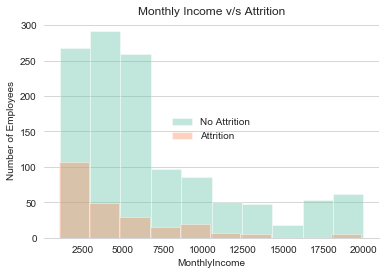

In [17]:
# Plotting Monthly Income v/s Attrition
graph6= sns.distplot(df[df['Attrition'] == 'No']['MonthlyIncome'], label='No Attrition', kde=0, bins=10)
sns.distplot(df[df['Attrition'] == 'Yes']['MonthlyIncome'],  label='Attrition', kde=0, bins=10)
sns.despine(left=1)
graph6.grid(axis='x')
graph6.set(title='Monthly Income v/s Attrition', ylabel ='Number of Employees')
graph6.legend(loc='center', frameon=False)
plt.show()

#### 3.2.3. OverTime and Attrition <a id="3.2.3"></a>

We can see employees who worked overtime had a significantly higher attrition rate than that of their employees who did not have to. Increasing the overall amount of hours worked and having workers stay late / arrive early increased the potential of them leaving.
Again, this provides another potential focus area for the HR's to enhance employee retention, by minimising overtime hours, employee satisfaction could increase, and this specific group of employees' chances of attrition could drop.

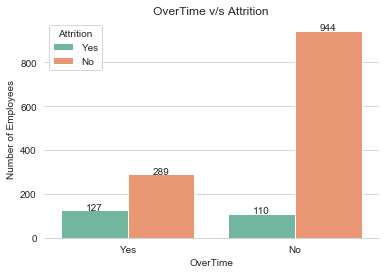

In [18]:
# plotting OverTime and Attrition
graph8 = sns.countplot(x='OverTime', hue='Attrition', data=df)
sns.despine(left=True)
graph8.set(title='OverTime v/s Attrition', ylabel ='Number of Employees')
for p in graph8.patches:
    graph8.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

### 3.3. Three-Variable Plot<a id="3.3"></a>

Multivariate plots are designed to describe the relationship among several variables simulataneously.

#### 3.3.1. JobRole vs HourlyRate vs Attrition<a id="3.3.1"></a>

For multivariate exploration, we have considered JobRole vs HourlyRate vs Attrition. The plot demonstrates effect of Attrition due to the hourly rate trend for different professionals.
From the plot, we can see that ratio of Attrition for a Research Scientist having a competitive hourly rate is low while the Attrition for the Sales Representative having a lower hourly rate is higher.

In [19]:
#Created a new dataframe hrate and grouped by Job Role
hrate = df.groupby(by='JobRole').mean().HourlyRate.round(1)
inc = pd.DataFrame(hrate)
inc = inc.sort_values(by='HourlyRate')

In [20]:
# Created a new dataframe which has probability of Atrrition by grouping Jobrole
df2 = pd.DataFrame(columns = [0,1,2])
df2 = df.groupby('JobRole')['Attrition'].value_counts().to_frame(name='prob').reset_index()

In [21]:
#Long-wide formatting
df2=df2.pivot(index='JobRole', columns='Attrition', values='prob').reset_index().fillna(0.000)
df2 = df2.set_index('JobRole')
#Concating the 2 dataframes
df3 = pd.concat([hrate, df2], axis=1)

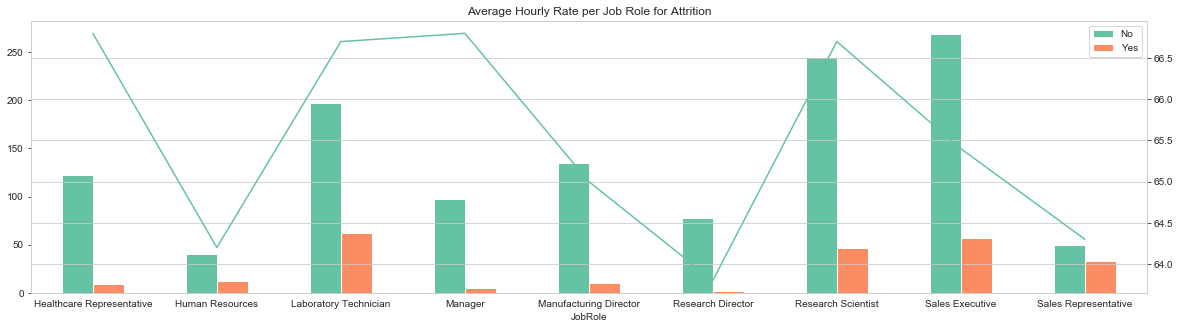

In [22]:
# Average Hourly Rate per Job Role for Attrition
plt.figure(figsize= (20,5))
line = df3['HourlyRate'].plot(secondary_y=True)
graph8 = df3[['No','Yes']].plot(kind='bar', ax=line, title = "Average Hourly Rate per Job Role for Attrition")

### 3.3.2. MonthlyIncome vs JobLevel vs Attrition <a id="3.3.2"></a>

From the visualization, we can predict that Attrition rate is constant upto JobLevel 3 but reduces to some extent for JobLevel 4. We can say that as the MonthlyIncome increases, the Attrition rate lowers.

Text(0.5, 1.0, 'Attrition Rate of Job Levels w.r.t. Average Monthly Income')

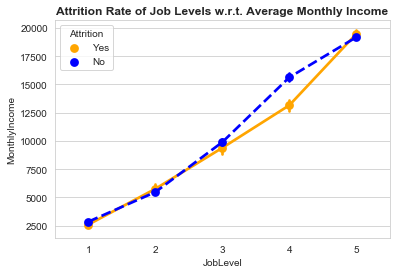

In [23]:
#plotting MonthlyIncome vs JobLevel vs Attrition
graph9 = sns.pointplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df,
              palette={"Yes": "orange", "No": "blue"}, linestyles=["-", "--"])
graph9.set_title('Attrition Rate of Job Levels w.r.t. Average Monthly Income', weight = 'bold')

### 3.3.3. Age vs Gender vs Attrition <a id="3.3.3"></a>

The median age for Male to switch or quit the company is 33 years while for Females it is 31 years. We can also say that probabilty of Male switching after the age 35 years is low and for Female it is 36 years.

Text(0.5, 0.98, 'Attrition Rate for Gender and Age')

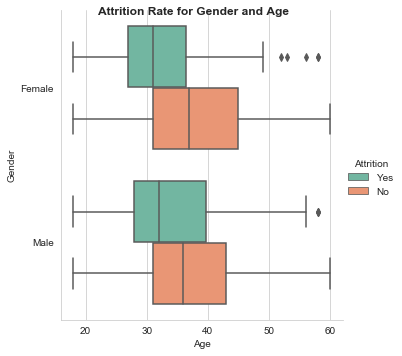

In [24]:
#plotting Attrition Rate for Gender and Age
graph10 = sns.catplot(x="Age", y="Gender", hue="Attrition",
            aspect=1,
            kind="box", data=df)
graph10.fig.suptitle('Attrition Rate for Gender and Age', weight = 'bold')

### 3.4 EDA Conclusion: <a id="3.3.4"></a>

##### Let's summarise the outcomes and findings from this EDA:

* Several features are redundant for further analysis namely Over18, StandardHours, EmployeeNumber, and EmployeeCount.

* The features "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition; while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.  
* There are no missing or incorrect data values in the dataset, and all features are of the proper data type.
* Class imbalance in the target variable can be problematic and in relation to this dataset our priority is on the minority class. Class imbalance creates a high level of baseline accuracy to improve upon our models. Methods such as under / oversampling could be necessary to reduce this disparity. 
* Employees with higher salaries and more responsbilities show lower attrition rate compared to others.
* During early career stages, attrition appears to be more common, most noticeably between the ages of 20 and 30. Retention of these younger workers and their growth within the company will be beneficial.
* By reducing overtime, employee satisfaction could increase and the risk of attrition for that particular group of workers could lower.
* Employee who work as Sales Representatives show a significant percentage of Attrition compared to other job roles. 

### 2.4. Encoding Variables <a id="2.4"></a>
Machine Learning algorithms work with numerical values as their predictor variables. Hence, it is necessary to encode variables. 

#### 2.4.1 Label Encoding of Target Variable <a id="2.4.1"></a>

We have used LabelEncoder() from sklearn.preprocessing package to convert target variable into binary variable with:
* No (current employees) = 0 = negative class
* Yes (ex-employees) = 1 = positive class

In [25]:
data = df.drop(columns = 'Attrition') # dropping attrition column from dataset
df.Attrition.value_counts() # checking value counts of classes of target

No     1233
Yes     237
Name: Attrition, dtype: int64

In [26]:
# label encoding target column
target = preprocessing.LabelEncoder().fit_transform(df.Attrition)
Y= target
print(type(Y))
print('Target Class Labels and Value Counst:', np.unique(Y, return_counts = True))

<class 'numpy.ndarray'>
Target Class Labels and Value Counst: (array([0, 1]), array([1233,  237]))


#### 2.4.2. One-hot Encoding of Categorical Variables<a id="2.4.2"></a>
We have used One-hot Encoding (generating dummies) of categorical variables to avoid introducing feature importance by using label encoding.

In [27]:
# dummies of other variables
data = pd.get_dummies(data, drop_first= True)

In [28]:
data.shape # shape after dummies

(1470, 44)

## 4. Predictive Modelling<a id="4"></a>

### 4.1. Modelling Approach<a id="4.1"></a>


Through predictive modelling, we aim to classify the employees that are likely to leave. That is , we have addressed the problem of **"Which employee is likely to leave the organisation?"** by predicting the attrition value with the help of classifier model built. We will achieve that by optimising our classifiers on the basis of ROC AUC score. 

**Area under ROC Curve is a performance metric for binary classification problems which explains the classifier's ability to discriminate between positive and negative classes.** We will use ROC AUC as the scoring metric measure as we have an imbalanced classification problem. 1 =ROC_AUC(Perfectly predicted & 0.5 = ROC_AUC(Model as good as random).

Our result will also be influenced by recall score. **Recall is the percentage of total relevant results correctly classified by the classifier**. With the help of recall, we can identify which active employee is likely to leave the company.

Steps in our modelling:
1. Feature Engineering - We have introduced two features as combination of features with high correlation to increase dependency of the target variable on others. 
2. Feature Scaling (MinMaxScaler).
3. Feature Selection - We have selected features using Random Forest Importance to identify features that are most likely to predict the target variable .
4. Test-train Split - We have split the data in 80:20 (training:test) ratio.
5. Model Evaluation Strategy - We have used Stratified Cross Validation ad well as baseline modelling to identify which models' optimisation will result in higher accuracy. 
6. Hyperparameter Tuning - We have used pipeline combined with customised RFI selector and grid search to find optimal parameters for each model via cross validation.
7. Performance Evaluation - We have compared the performance of models to select the most effective one on basis of paired t-test, classification report and ROC Curve. 

Accuracy cannot solely compare performance in a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels. Thus, we will take into consideration AUC score as well as recall.

### 4.2. Feature Engineering<a id="4.2"></a>

In the correlation matrix, we saw that the target variable is weakly correlated with majority of the variables. thus, we are using feature enginieering to use a combination of variables in order to incraese the dependency of target variable on others. 

We have feature engineered two variables :
* __Growth__ - We have computed ratio of YearsInCurrentRole and YearsAtCompany as growth of an employee. It explains how long has the employee been performing the same role proportionate to the its years in the company (We have added '+1' to avoid division by zero). Growth can influence the employee's tendency to leave the company.
$$Growth = \frac {YearsInCurrentRole}{YearsAtCompany + 1}$$

* __SwitchRate__ - We have computed how frequently the employee switches the company by divinding the NumCompaniesWorked with TotalWorkingYears. This can help us analyse any latent trend of the employee's attrition. 
$$SwitchRate = \frac {NumCompaniesWorked}{TotalWorkingYears + 1}$$

In [29]:
# Adding growth
data['Growth']= (data['YearsInCurrentRole']/(data['YearsAtCompany'] +1)).round(3)
data['Growth'].head(3)

0    0.571
1    0.636
2    0.000
Name: Growth, dtype: float64

In [30]:
# Adding growth
data['SwitchRate'] = np.where(data['TotalWorkingYears'] == 0, data['NumCompaniesWorked']/(data['TotalWorkingYears']+1), data['NumCompaniesWorked']/data['TotalWorkingYears'])
data['SwitchRate'].head(3)

0    1.000000
1    0.100000
2    0.857143
Name: SwitchRate, dtype: float64

### 4.3. Feature Scaling<a id="4.3"></a>

We are using __MinMaxScaler()__ for feature scaling as it tranforms the decriptive features' values within the range 0 and 1. Feature scaling serves the purpose of eliminating different unit of mesaurement by scaling the data within a similar range. 

In [31]:
# using MinMaxScaler to scale the data
X= preprocessing.MinMaxScaler().fit_transform(data).round(3)
X
print(type(X))

<class 'numpy.ndarray'>


* The resultant dataset has 46 columns for 1470 employees.

### 4.4. Feature Selection<a id="4.4"></a>
Feature Selction methods looks for possibility to use few relevant features to avoid excessive computational times and enhance model performance. 
* Here, we are using **Random Forest Importance(RFI)** as a filter feature selection method which uses the total decrease in node impurities of splitting feature as averaged over all decision trees(n_estimators, in our case is 100) in the ensemble. 
* We are taking top 10 features filtered by RFI to identify the top 10 features that influence or can best predict target variable. 

With the help of this step, we can identify the top 10 areas that require highest attention of HR to reduce employee attrition, thus, answering our problem statement **"Which factors contribute most to the employee attrition?"**.

In [32]:
n = 10 # setting number of features as 10
model_rfi = RandomForestClassifier(n_estimators=100) # rfi selection model
model_rfi.fit(X, Y) # training the model
fs_indices = np.argsort(model_rfi.feature_importances_)[::-1][0:n] #sorting model on feature importance

bestFeatures = data.columns[fs_indices].values
bestFeatures # important features

array(['MonthlyIncome', 'SwitchRate', 'Age', 'DailyRate', 'HourlyRate',
       'OverTime_Yes', 'MonthlyRate', 'DistanceFromHome',
       'TotalWorkingYears', 'YearsAtCompany'], dtype=object)

In [33]:
featureImportance = model_rfi.feature_importances_[fs_indices]
featureImportance # feature importance score

array([0.06481126, 0.05731474, 0.05397255, 0.04835217, 0.04647571,
       0.04589731, 0.04512796, 0.04439898, 0.04182171, 0.03762947])

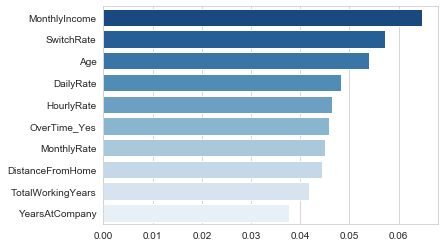

In [34]:
sns.barplot(y= bestFeatures, x = featureImportance, palette= 'Blues_r') # plotting top 10 features on importance

Through feature selection, we see that the **MonthlyIncome** has the highest feature importance in predicting the target variable. With the help of the exploration graph and feature importance, we can see that if the Monthly Income is high, the, employees are less likely to leave the company. 
These variables can be used for designing retention strategies by HR.

### 4.5. Data Sampling and Train-Test Split<a id="4.5"></a>
We split the data and the target feature into training:test (80:20), i.e., we will use 80% of the data to train the classifier and 20% to evaluate its performance.
Since, target variable is an imbalanced class with 84% ‘0’s and 16% ‘1’s, “stratify=y” will make sure that the 80:20 split has 84% of ‘0’s and 16% of ‘1’s in both output datasets.

In [35]:
# train-test split
data_train, data_test, target_train, target_test = train_test_split(X, Y, test_size=0.2, random_state=999, stratify = Y)
print('Shape of data_train :', data_train.shape)
print('Shape of data_test :', data_test.shape)
print('Shape of target_train :', target_train.shape)
print('Shape of target_test :', target_test.shape)

Shape of data_train : (1176, 46)
Shape of data_test : (294, 46)
Shape of target_train : (1176,)
Shape of target_test : (294,)


### 4.6. Model evaluation<a id="4.6"></a>

As the target class is imbalanced, we have used **“StratifiedKFold”** in cross validation when training the models.

In [36]:
cv_method = StratifiedKFold(n_splits=5, random_state=999)

As this is a relatively small dataset, we aim to assess few baseline models and then fine tune the best performing classifiers to produce best possible roc_auc for the dataset, more accurately than baseline, as the computation time will not be significant.<br>
However, this strategy would not suit large datasets as running through multiple models may increase time cost of the company.

Initially, we are using baseline models (with default parameters) to evaluate their performance for selection of most effective models and then fine-tuning the hyper-parameters of the selected models.<br>
The algorithms considered in this section are: **Logistic Regression, Random Forest, KNN, Decision Tree Classifier, Gaussian NB**.

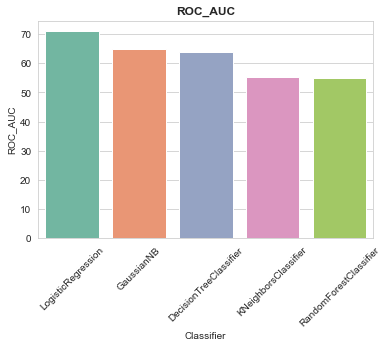

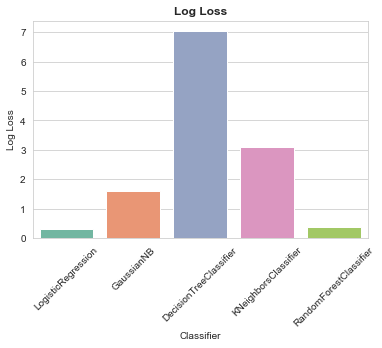

In [37]:
""" Defining the models """
classifiers = [LogisticRegression(), KNeighborsClassifier(3), DecisionTreeClassifier(), RandomForestClassifier(),GaussianNB()]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "ROC_AUC", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and
    printing the roc_auc and log loss of each model. """

for clf in classifiers:
    clf.fit(data_train, target_train)
    name = clf.__class__.__name__
    
    train_predictions = clf.predict(data_test)
    acc = roc_auc_score(target_test, train_predictions)
    
    train_predictions = clf.predict_proba(data_test)
    ll = log_loss(target_test, train_predictions)
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    

cls = log.sort_values(by = 'ROC_AUC', ascending = False)
cls1 = log.sort_values(by = 'Log Loss', ascending = False)


fig = sns.barplot(x='Classifier', y='ROC_AUC', data=cls)
plt.xticks(rotation = 45)
fig.set_title('ROC_AUC', weight = 'bold')
plt.show()

fig = sns.barplot(x='Classifier', y='Log Loss', data=cls)
plt.xticks(rotation = 45)
fig.set_title('Log Loss', weight = 'bold')
plt.show()

print()

Here, we can see that Logistic Regression results in highest roc_auc (with little over 70%) followed by GaussianNB and Decision Tree.

But in the plot of log loss, we notice that decision tree gives the highest log loss in comparison to others. Log Loss takes measures the uncertainty of the prediction based on its deviation from the actual label. Since, log loss is computed for classification problem, thus, we have used log loss as a parameter for model evaluation.
Thus, we will fine-tune the following models:
1. **KNN**  
2. **Naive Bayes**   
3. **Random Forest**  
4. **Logistic Regression**

### 4.7. Hyper-Parameter Tuning<a id="4.7"></a>

* A critical stage in ML algorithms is to find **optimal** parameters to improve the accuracy of the models.
* We have fine-tuned our models based on **roc_auc scoring metric** since there is class imbalance and our focus is on the positive class(ex-employees).
* During the hyperarameter tuning phase, we have used **customised RFI (with 100 estimators)** as part of the pipeline to search over a combination of 10, 20 and all 46 features of the dataset to determine which combination of features with optimal hyperparameters via cross-validation, resulting in the highest score.
* We have used Grid search as it exhaustively searches through all possible combinations of hyperparameters during training the phase. 
* Hyperparameter tuning via **grid search** uses cross validation to avoid overfitting.

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

#### 4.7.1. KNN<a id="4.7.1"></a>

The KNN algorithm classifies new data based on the class of the k nearest neighbors. <br>
The KNN hyperparameters are as follows:
* Number of neighbors **n_neighbors**
* The distance metric **p**.


In [39]:
pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                   'knn__n_neighbors': [10, 50, 70, 80],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           scoring='roc_auc',
                           verbose=1) 

In [40]:
gs_pipe_KNN.fit(data_train, target_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   32.3s finished


In [41]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 70, 'knn__p': 1, 'rfi_fs__n_features_': 46}

In [42]:
gs_pipe_KNN.best_score_

0.7996907358382112

After fine-tuning, we have achieved a mean AUC score of **0.799**. The best performing KNN parameters are :
* Number of Features = 46
* N_neighbours = 70
* Distance metric, p = 1(Manhattan distance)

In order to check for any other possible combinations, we have used function below to format the grid search outputs as a Pandas data frame.

In [43]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [44]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
14,0.799691,0.031282,0.857257,0.775247,70.0,1.0,46.0
20,0.792634,0.030509,0.847754,0.763492,80.0,1.0,46.0
23,0.787748,0.033333,0.844365,0.751737,80.0,2.0,46.0
19,0.783977,0.038822,0.833289,0.739514,80.0,1.0,20.0
17,0.780732,0.039412,0.847023,0.746527,70.0,2.0,46.0


We observe that there is insignificant difference between the hyperparameter combinations. 

In order to see any scope for any further hyperparameter tuning, we have visualised the results of grid search over optimal number of features. 

In [45]:
results_KNN_features = results_KNN[results_KNN['rfi_fs__n_features_'] == data.shape[1]]

alt.Chart(results_KNN_features, 
          title='KNN Performance Comparison with 46 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

Here, we can see that ,after our optimal number of n_neighbours(70), the accuarcy is falling. 

In [46]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7304833333333333

In [47]:
print('ROC_AUC of Train Set:', gs_pipe_KNN.best_score_)
print('ROC_AUC of Test Set:', cv_results_KNN.mean())

ROC_AUC of Train Set: 0.7996907358382112
ROC_AUC of Test Set: 0.7304833333333333


This shows that by performing hyperparameter tuning we have increased the roc_auc score of the classifier in comparison to the baseline model.
KNN results in **0.731 roc_auc score**.

#### 4.7.2. Naive Bayes<a id="4.7.2"></a>

The Naive Bayes algorithm calculates probabilities of all independent variables which are used for classifiaction. It has only one hyperparameter that needs to be optimised = **var_smoothing** which explains the portion of highest variance of all features to be added to variances for calculation stability.

We have used Power Transformation for NB. 

In [48]:
from sklearn.preprocessing import PowerTransformer
data_train_transformed = PowerTransformer().fit_transform(data_train)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                  'nb__var_smoothing': np.logspace(0,-9, num=100)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1,
                         random_state = 999) 

gs_pipe_NB.fit(data_train_transformed, target_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:   13.0s finished


In [50]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 46, 'nb__var_smoothing': 0.657933224657568}

In [51]:
gs_pipe_NB.best_score_

0.7790350742260974

After fine-tuning, we have achieved a mean AUC score of **0.779**. The best performing NB parameters are :
* Number of Features = 46
* var_smoothing = 0.6579

In order to check for any other possible combinations, we have used the grid search output.

In [52]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
0,0.779035,0.033558,0.834662,0.729495,46.0,6.579332e-01
14,0.776877,0.030658,0.828416,0.732567,46.0,1.873817e-01
3,0.774023,0.029658,0.824296,0.731766,46.0,8.111308e-04
15,0.773970,0.029618,0.824163,0.731766,46.0,2.848036e-07
4,0.773970,0.029618,0.824163,0.731766,46.0,1.232847e-05


In [53]:
results_NB_features = results_NB[results_NB['rfi_fs__n_features_'] == data.shape[1]]

alt.Chart(results_NB_features, 
          title='NB Performance Comparison with Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

Here, we can see that ,after our optimal number of var_smoothing, the accuarcy is slowly dropping. 

In [54]:
data_test_transformed = PowerTransformer().fit_transform(data_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=data_test_transformed,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7063666666666666

In [55]:
print('ROC_AUC of Train Set:', gs_pipe_NB.best_score_)
print('ROC_AUC of Test Set:', cv_results_NB.mean())

ROC_AUC of Train Set: 0.7790350742260974
ROC_AUC of Test Set: 0.7063666666666666


This shows that by performing hyperparameter tuning we have increased the roc_auc score of the classifier in comparison to the baseline model. <br>
NB results in **0.706 roc_auc score**.

#### 4.7.3. Random Forest<a id="4.7.3"></a>

Random Forest ensembles a number of decision tree classifiers(n_estimators) on various sub-samples of the dataset and use average to improve the predictive accuracy and control over-fitting. 

The RF hyperparameters are as follows:
* Number of estimators or decision trees to ensemble **n_estimators**
* Max depth of tree.

In [56]:
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier(criterion='entropy', random_state=999))])

params_pipe_RF = {'rfi_fs__n_features_': [10, 20, data.shape[1]], 
                 'rf__n_estimators':[100, 200, 400, 600],
                 'rf__max_depth':[4,6,8]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(data_train, target_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.9min finished


In [57]:
gs_pipe_RF.best_params_

{'rf__max_depth': 8, 'rf__n_estimators': 400, 'rfi_fs__n_features_': 46}

In [58]:
gs_pipe_RF.best_score_

0.806289045949746

After fine-tuning, we have achieved a mean AUC score of **0.806**. The best performing RF parameters are :
* Number of Features = 46
* n_estimators = 400
* Max Depth = 8

In order to check for any other possible combinations, we have used the grid search output.

In [59]:
results_RF = get_search_results(gs_pipe_RF)

results_RF_features = results_RF[results_RF['rfi_fs__n_features_'] == data.shape[1]]

alt.Chart(results_RF_features, 
          title='RF Performance Comparison with Features'
         ).mark_line(point=True).encode(
    alt.X('rf__n_estimators', title='N Estimators'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('rf__max_depth:N', title='Max Depth')
)

alt.Chart(...)

Here, we can see that ,after our optimal number of n_estimators, the accuarcy is falling. 

In [60]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7478

In [61]:
print('ROC_AUC of Train Set:', gs_pipe_RF.best_score_)
print('ROC_AUC of Test Set:', cv_results_RF.mean())

ROC_AUC of Train Set: 0.806289045949746
ROC_AUC of Test Set: 0.7478


This shows that by performing hyperparameter tuning we have increased the roc_auc score of the classifier in comparison to the baseline model. <br>
RF results in **0.7478 roc_auc score**.

#### 4.7.4. Logistic Regression<a id="4.7.4"></a>

Logistic Regression is a ML classification algorithm that is used to predict the probability of a categorical dependent variable. 

The Logisitic Regression hyperparameters are as follows:
* C- Inverse of regularization strength; must be a positive float.
* penalty- Used to specify the norm used in the penalization.

In [62]:
pipe_LR = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('LR', LogisticRegression())])

params_pipe_LR = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                  'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'LR__penalty':['l1','l2']}

gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                          param_grid=params_pipe_LR, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_LR.fit(data_train, target_train);

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-2)]: Done 210 out of 210 | elapsed:   30.1s finished


In [63]:
gs_pipe_LR.best_params_

{'LR__C': 1, 'LR__penalty': 'l2', 'rfi_fs__n_features_': 46}

In [64]:
gs_pipe_LR.best_score_

0.8405449094201431

After fine-tuning, we have achieved a mean AUC score of **0.841**. The best performing LR parameters are :
* Number of Features = 46
* C = 1
* Penalty = l2

In order to check for any other possible combinations, we have used the grid search output.

In [65]:
results_LR = get_search_results(gs_pipe_LR)

results_LR_features = results_LR[results_LR['rfi_fs__n_features_'] == data.shape[1]]

alt.Chart(results_LR_features, 
          title='LR Performance Comparison with Features'
         ).mark_line(point=True).encode(
    alt.X('LR__C', title='C'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('LR__penalty:N', title='Penalty')
)

alt.Chart(...)

Here, we can see that ,after our optimal number of C, the accuarcy is rapidly falling and slows down after a point. 

In [66]:
cv_results_LR = cross_val_score(estimator=gs_pipe_LR.best_estimator_,
                                X=data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_LR.mean()

0.7787666666666666

In [67]:
print('ROC_AUC of Train Set:', gs_pipe_LR.best_score_)
print('ROC_AUC of Test Set:', cv_results_LR.mean())

ROC_AUC of Train Set: 0.8405449094201431
ROC_AUC of Test Set: 0.7787666666666666


This shows that by performing hyperparameter tuning we have increased the roc_auc score of the classifier in comparison to the baseline model. <br>
LR results in **0.779 roc_auc score**.

#### Hyper-Parameter Tuning Summary

After tuning hyperparameters to obtain **optimal combination of parameters and number of features**, we have achieved following results:
* Logistic Regression has the highest roc_auc score amongst all(**0.779**) with optimal C value as 1, n_features as 46 and penalty as default value as l2.

In [70]:
# Creating a summary table
results = pd.DataFrame(columns = (0,1))
results.columns = ['Classifier', 'AUC_of_Test_Set']
results['Classifier'] = ['KNN', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
results['AUC_of_Test_Set'] = [cv_results_KNN.mean(), cv_results_NB.mean(), cv_results_RF.mean(), cv_results_LR.mean()]
results.sort_values(by = 'AUC_of_Test_Set')

,Classifier,AUC_of_Test_Set
1,Naive Bayes,0.706367
0,KNN,0.730483
2,Random Forest,0.747800
3,Logistic Regression,0.778767


### 4.8. Performance Evaluation<a id="4.8.1"></a>

In order to evaluate the performance of the classifiers, we have used 3 different approach:
1. Paired t-test
2. Classification Metric
3. ROC Graph

#### 4.8.1. Paired t-test<a id="4.8.1"></a>

In addition to the mean AUC score computed by using cross-validation(as it is a random process), we have conducted a more robust performance evaluation by performing statistical test (paired t-test) to determine if the difference between the performance of any two classifiers is statistically significant.
Having the above information, we have used a statistical hypothesis test to select the final model. Statistical significance tests quantify the likelihood of the samples of performance score being observed given the assumption that they were drawn from the same distribution.

**Null Hypothesis (ho) : The difference between the performance of any two classifiers is statistically significant.**

We have used paired t-test as it determines whether the mean of a dependent variable (i.e., target variable - Attrition) is the same in two related groups (i.e., the classifiers). Thus, it is used when we have to compare the same dataset under two different conditions. We have assumed our confindence interval to be 95%, thus, if the p-value is smaller than 0.05, we conclude that the difference is statistically significant.

In [71]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_LR))
print(stats.ttest_rel(cv_results_NB, cv_results_RF))
print(stats.ttest_rel(cv_results_NB, cv_results_LR))
print(stats.ttest_rel(cv_results_RF, cv_results_LR))

Ttest_relResult(statistic=0.7575092501810794, pvalue=0.4681133227275688)
Ttest_relResult(statistic=-0.38072542688738625, pvalue=0.7122378468992988)
Ttest_relResult(statistic=-1.393033889037614, pvalue=0.19705620575161117)
Ttest_relResult(statistic=-1.3224501021087574, pvalue=0.21863686256048057)
Ttest_relResult(statistic=-2.455416508408966, pvalue=0.036431559740330986)
Ttest_relResult(statistic=-1.0040489881343682, pvalue=0.34158465631217516)


We can see that for only **Naive Bayes and Logistic Regression** the p-value is smaller than 0.05 which supports our results as roc auc score of Logistic Regression( ) is significantly higher than Naive Bayes( ). Thus, the difference is statitically significant and the two classifiers are not comparable.

#### 4.8.2. Classification Report<a id="4.8.2"></a>

While we used AUC to optimise the hyperparameters of the algorithm, we will find the following metrics to evaluate the models based on the test set: 
* Accuracy
* Precision
* Recall
* F1 Score (the harmonic average of precision and recall)
* Confusion Matrix
Such metrics can be measured using sklearn.metrics classification report. Details on the classification as shown below.

In [73]:
pred_KNN = gs_pipe_KNN.predict(data_test)
data_test_transformed = PowerTransformer().fit_transform(data_test)
pred_NB = gs_pipe_NB.predict(data_test_transformed)
pred_RF= gs_pipe_RF.predict(data_test)
pred_LR= gs_pipe_LR.predict(data_test)

In [74]:
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(target_test, pred_RF))
print("\nClassification report for Logistic Regression") 
print(metrics.classification_report(target_test, pred_LR))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       247
           1       0.37      0.40      0.38        47

    accuracy                           0.79       294
   macro avg       0.62      0.64      0.63       294
weighted avg       0.80      0.79      0.80       294


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.80      0.09      0.15        47

    accuracy                           0.85       294
  

* We can say that Random Forest has the highest Precision of 83% followed by Logistic Regression, Naive Bayes and lastly KNN.
* Also, for Recall, Logisitic Regression gives us better results followed by Naive Bayes, Random Forest and KNN. 
* In order to fully determine a model's efficiency, both precision and recall must be evaluated. However, there's always friction between accuracy and recall. That is, precision enhancement usually decreases recall, and vice versa.
* In our case, we are maximising the combination of precision and recall in **Logistic Regression.**
* Our major focus is to achieve a significant recall percentage so that we can identify which employee is most likely to leave the company which is 45% in Logistic Regression. 

The Confusion matrix provides us with a much more detailed representation of the accuracy score and of what's going on with our labels - we know exactly which/how labels were correctly and incorrectly predicted. <br>
The Confusion matrix can be given as:

In [75]:
# Confusion matrix
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(target_test, pred_RF))
print("\nConfusion matrix for Logistic Regression") 
print(metrics.confusion_matrix(target_test, pred_LR))


Confusion matrix for K-Nearest Neighbor
[[247   0]
 [ 47   0]]

Confusion matrix for Naive Bayes
[[214  33]
 [ 28  19]]

Confusion matrix for Random Forest
[[246   1]
 [ 43   4]]

Confusion matrix for Logistic Regression
[[241   6]
 [ 26  21]]


#### 4.8.3. ROC  <a id="4.8.3"></a>

* AUC-ROC curve is a performance metric at specific threshold setting for classification problem. 
* ROC is a probability curve, and AUC is a degree or separability measure. This says how much model one can differentiate between classes.
* A good classifier stays as far away from that line as possible (toward the top-left corner). In our case, it is **Logistic Regression**(Blue Line) has the highest AUC score of Test Set **78.64%**.

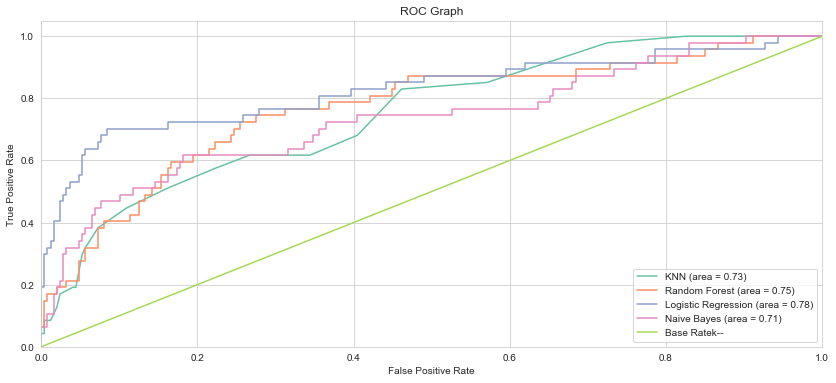

In [76]:
# Create ROC Graph
from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, knn_thresholds = roc_curve(target_test, gs_pipe_KNN.best_estimator_.predict_proba(data_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(target_test, gs_pipe_RF.best_estimator_.predict_proba(data_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(target_test, gs_pipe_NB.best_estimator_.predict_proba(data_test)[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(target_test, gs_pipe_LR.best_estimator_.predict_proba(data_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot KNN ROC
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % cv_results_KNN.mean() )
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % cv_results_RF.mean())
# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % cv_results_LR.mean())
# Plot Naive Bayes ROC
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % cv_results_NB.mean() )
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## 5. Conclusion<a id="5"></a>

### Model Selection
On the basis of above results, we would recommend the use of **Logistic Regression** as the machine learning algorithm to be implemented. We have following conclusions for Model Selection:

* The **Logistic Regression** model(with C=1) stands out as the best model to optimise on which supports the fact that LR is most accurate with binary target problem.
* The AUC score was the highest in case of Logistic Regression and lowest for Naive Bayes. But since, we are focussing on recall to predict the employees that are likely to leave the organisation, Logistic Regression and Niave Bayes have highest recall of 45% and 40% respectively. Recall is the percetange of correctly classified employees in the predicted results.
* Thus, we perform paired t-test which proved that the difference in AUC score of the two classifiers (LR and NB) is statistically significant and thus, LR is better than Naive Bayes. 
* Also, the time taken to run LR is relatively less resulting in significant savings of time cost of the company. 
* Logistic Regression also predicts a higher area under the curve and a better confusion matrix.

Due to relatively small set for training and test, there is room for further analysis and improvement and tuning of the models. In addition, more classifiers and different architectures can be tested in future attempts.

###  Employee Retention Plans
With the help of top 10 features identified by Random Forest Classfier - [Feature Selection](#4.4), HR Department can initiate various programs with respect to those features to address the problem **3. Which programs can HR implement to reduce employee attrition?**. Following plans can be taken into consideration:

1. **MonthlyIncome** : Higher compensation package is major driver of employee retention. Thus, the company can reguarly revise their compensation package based on industry benchmark and adjusted inflation. 
2. **Age** : Within the age bracket of 30-35 years, employees are more likely to leave the company. Thus, youth leadership programs can be initiated to improve promotion of worthy young employees so that the attrition rate falls.
3. **Over Time** : Employees who frequently work overtime are more likelty to leave the company. Thus, timeline for projects must be taken into scope to provide adequate support and manpower so as to reduce the use of overtime.

## 6. Assumptions, Strengths, Weaknesses and Limitations<a id="6"></a>

### 6.1. Assumptions <a id="6.1"></a>

* We assume that the feature selection method (RFI) takes cares of multicollinearity in variables.
* We assume that the dataset addresses the problem to identify of the employees who are likely to leave thus, we have used **roc_auc** for optimisation of models as we have to focus on positive class. 
* While evaluating baseline models, we have assumed that log loss will significantly decrease the test set accuracy and thus, decision tree should not be a part of further fine tuning. Thus, on the basis of AUC and Log loss we have selected the 4 models.

### 6.2. Strength and Weakness <a id="6.2"></a>

#### Strength
* Logistic Regression performs accurately in case of binary target variable.
* The outputs have a decent probabilistic interpretation and, to prevent overfitting, the Logistic Regression algorithm can be regularised. Using stochastic gradient descent, logistic models can be easily applied on unseen data.

#### Weakness
* Small dataset for training and test has reduced our scope to optimise our classifier on basis of recall. 
* F1 score is low , due to small test set which increases the weight of every incorrect label in proportion to predicted results.  

### 6.3. Limitations <a id="6.3"></a>

* Since, our training set is relatively small as well as our test set consists ,thus, we have low recall.
* In order to fully determine a model's efficiency, both precision and recall must be evaluated. However, there's always friction between accuracy and recall. That is, precision enhancement usually decreases recall, and vice versa.
* Although this accuracy seems significant enough to mark it a success, looking back on this project, little has been done to fix the class imbalance that could have influenced our model.
* While this accuracy sounds high enough to deem it a success, looking back on this project, nothing was done to address the class imbalance, which may have affected our model

## 7. References<a id="7"></a>

* Reference for Employee Attrition Definition : Hr.toolbox.com. 2020. What Is Employee Attrition? Definition, Attrition Rate, Factors, And Reduction Best Practices. [online] Available at: <https://hr.toolbox.com/articles/what-is-attrition-complete-guide> [Accessed 31 May 2020].
* Reference for Predictive Modelling : www.featureranking.com. 2020. Case Study: Predicting Income Status | Www.Featureranking.Com. [online] Available at: <https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/> [Accessed 31 May 2020].
* Reference for Countplot : frequencies, S. and Zhu, C., 2020. Seaborn: Countplot() With Frequencies. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies> [Accessed 31 May 2020].
* Seaborn.pydata.org. 2020. Plotting With Categorical Data — Seaborn 0.10.1 Documentation. [online] Available at: <https://seaborn.pydata.org/tutorial/categorical.html> [Accessed 31 May 2020].
* Reference for Heatmap : Medium. 2020. Better Heatmaps And Correlation Matrix Plots In Python. [online] Available at: <https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec> [Accessed 31 May 2020].